<a href="https://colab.research.google.com/github/venkatesh1226/CMPE255-DataMining/blob/main/Twitter_Gaussian_mixture_models_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the dataset

In [ ]:
import zipfile
import pandas as pd

# Path to the zip file and extraction directory
zip_file_path = '/content/drive/MyDrive/DM_Assignment_06/twitter black panther.zip'
extraction_path = '/content/drive/MyDrive/DM_Assignment_06/twitter black panther'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [ ]:
# Replace with the path to the extracted file
file_path = '/content/drive/MyDrive/DM_Assignment_06/twitter black panther/Black Panther.csv'
df = pd.read_csv(file_path,encoding='ISO-8859-1')

# Display the first few rows to understand the data
print(df.head())


                                              Tweets       User_name Language  \
0  RT @CoachWilmore: #120: William OÕNeal and the...  SusieNattibree       en   
1  RT @soprettyinlou: I hope my girl Shuri can br...     zinedine_7x       en   
2  RT @PollsNig: Ok guys get in here, who do you ...       edxxtrock       en   
3  the thing is... black panther was so so good b...     zekejaegers       en   
4  RT @HillaryClinton: Saw Black Panther with Bil...       quirion77       en   

                             Location                            Time  
0                                 NaN  Sun Mar 04 10:28:35 +0000 2018  
1                                   P  Sun Mar 04 10:28:35 +0000 2018  
2                    Toulouse, France  Sun Mar 04 10:28:35 +0000 2018  
3                                 NaN  Sun Mar 04 10:28:36 +0000 2018  
4  Loire-Atlantique, Pays de la Loire  Sun Mar 04 10:28:36 +0000 2018  


For Gaussian Mixture Models (GMM) clustering, we need to work with numerical features. Since Tweets is a textual column, we can convert it into a numerical representation using techniques like TF-IDF (Term Frequency-Inverse Document Frequency). Other columns like Language and Location could be encoded if relevant, but for simplicity, let's focus on the Tweets column.

Step 1: Text Preprocessing

We'll start by cleaning and preprocessing the tweets:

In [ ]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Function for cleaning the text data
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)  # Remove non-letters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text

# Apply the cleaning function to the Tweets column
df['CleanedTweets'] = df['Tweets'].apply(clean_text)


Step 2: Feature Extraction using TF-IDF

Transform the cleaned tweets into a numerical format:

In [ ]:
# Initializing the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed

# Fitting and transforming the cleaned tweets
tfidf_matrix = tfidf_vectorizer.fit_transform(df['CleanedTweets'])


Step 3: Applying Gaussian Mixture Models

Now, apply GMM clustering:

In [ ]:
from sklearn.mixture import GaussianMixture

# Apply Gaussian Mixture Models
gmm = GaussianMixture(n_components=5)  # Adjust the number of components as needed
gmm.fit(tfidf_matrix.toarray())

# Predict the cluster for each data point
labels = gmm.predict(tfidf_matrix.toarray())
df['Cluster'] = labels


Step 4: Analyzing the Results

After clustering, you can analyze the clusters:

In [ ]:
# Analyzing clusters
for i in range(5):  # Adjust based on the number of clusters
    cluster_data = df[df['Cluster'] == i]
    print(f"Cluster {i} has {len(cluster_data)} tweets")


Cluster 0 has 81 tweets
Cluster 1 has 52768 tweets
Cluster 2 has 5125 tweets
Cluster 3 has 4925 tweets
Cluster 4 has 9951 tweets


Dimensionality Reduction

First, reduce the dimensions of your TF-IDF matrix. Let's use t-SNE for this, as it's particularly good for preserving the local structure of high-dimensional data in a lower-dimensional space.

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Applying t-SNE to reduce dimensions
tsne = TSNE(n_components=2, random_state=0)
tsne_result = tsne.fit_transform(tfidf_matrix.toarray())

# Adding the t-SNE results to the DataFrame
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]


Plotting the Clusters

Now, plot these results with the cluster labels:

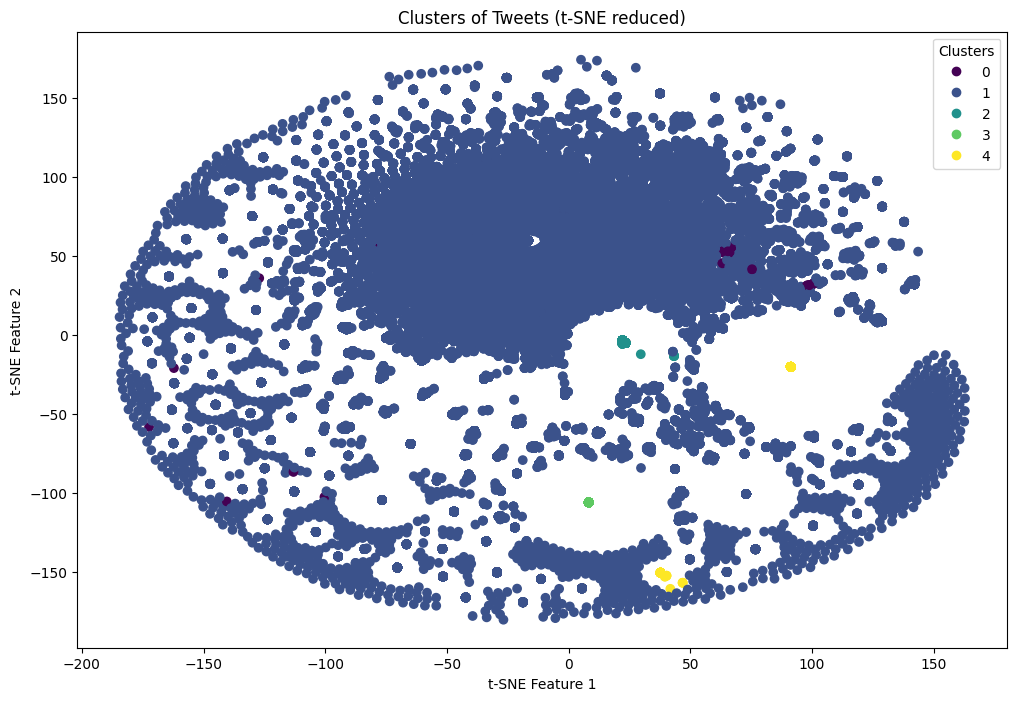

In [ ]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['TSNE1'], df['TSNE2'], c=df['Cluster'], cmap='viridis')
plt.title('Clusters of Tweets (t-SNE reduced)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()
